In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, RocCurveDisplay, roc_curve, auc, matthews_corrcoef, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
# Read the text file into a DataFrame
df_1 = pd.read_csv('/home/adralilla/Documents/Thesis/output_group_1.fasta_gt1bp_dvfpred.txt', delimiter='\t', header=None)
df_5 = pd.read_csv('/home/adralilla/Documents/Thesis/output_group_5.fasta_gt1bp_dvfpred.txt', delimiter='\t', header=None)
df_10 = pd.read_csv('/home/adralilla/Documents/Thesis/output_group_10.fasta_gt1bp_dvfpred.txt', delimiter='\t', header=None)

# Create a list of column names
column_names = df_1.iloc[0]

# Assign the column names to the DataFrame
df_1.columns = column_names
df_5.columns = column_names
df_10.columns = column_names

# Remove the row containing the column names from the DataFrame
df_1 = df_1[1:]
df_5 = df_5[1:]
df_10 = df_10[1:]

df=pd.concat([df_1, df_5, df_10], ignore_index=True)

df['GT_class'] = df['name'].str.rsplit('_', n=1).str[-1]

# Print the DataFrame
print(df)

0                                                   name   len  \
0      LCA_seed33_repr_k6_Pshort0_1024_s4000_k6s1_rec...  1026   
1      LCA_seed33_repr_k6_Pshort0_1024_s4000_k6s1_rec...  1026   
2      LCA_seed33_repr_k6_Pshort0_1024_s4000_k6s1_rec...  1026   
3      LCA_seed33_repr_k6_Pshort0_1024_s4000_k6s1_rec...  1026   
4      LCA_seed33_repr_k6_Pshort0_1024_s4000_k6s1_rec...  1026   
...                                                  ...   ...   
29666  LCA_seed33_repr_k6_Pshort0_1024_s4000_k6s1_rec...  1026   
29667  LCA_seed33_repr_k6_Pshort0_1024_s4000_k6s1_rec...  1026   
29668  LCA_seed33_repr_k6_Pshort0_1024_s4000_k6s1_rec...  1026   
29669  LCA_seed33_repr_k6_Pshort0_1024_s4000_k6s1_rec...  1026   
29670  LCA_seed33_repr_k6_Pshort0_1024_s4000_k6s1_rec...  1026   

0                       score                 pvalue GT_class  
0          0.9999982714653015  0.0004343228340509102        1  
1          0.5079078674316406     0.0579537729435758        1  
2          0.99

In [3]:
# True labels
true_labels = df["GT_class"].astype(int)

# Predicted labels
predicted= df["score"].astype(float)

# Define a threshold to convert float predictions into discrete values
threshold = 0.5

# Convert float predictions to discrete values based on the threshold
predicted_labels = [1 if val >= threshold else 0 for val in predicted]

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
cm

array([[12890,  1940],
       [ 1223, 13618]])

In [4]:
mcc = matthews_corrcoef(true_labels, predicted_labels)
print(mcc)

0.7877118739056986


In [5]:
acc = accuracy_score(true_labels, predicted_labels)
print(acc)

0.8933975936099221


In [6]:
recall = recall_score(true_labels, predicted_labels, average="binary", pos_label= 1)
print(recall)

0.917593154100128


In [7]:
f1 = f1_score(true_labels, predicted_labels, average="binary", pos_label= 1)
print(f1)

0.895950524688312


In [8]:
prec = precision_score(true_labels, predicted_labels, average="binary", pos_label= 1)
print(prec)

0.8753053091657025


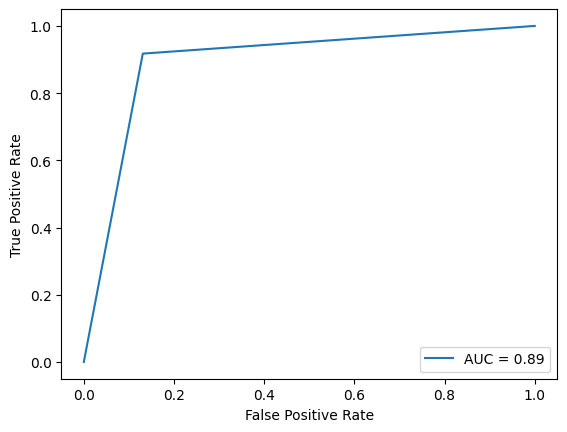

In [9]:
fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()